# K-Means Clustering

In this notebook we will work on popular Iris dataset. We aim to find the optimum number of clusters to put a particular type of Iris flower in a particular cluster on the basis of its sepal length, sepal width, petal length and petal width. We will use K-Means clustering to find out the optimum number of clusters.
    
LET'S START

## ImportIng the relevant libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Loading the data

In [7]:
# Loading the data
data = pd.read_csv('C:\\Users\\Dolly\\Desktop\\Clustering\\iris_dataset.csv')
# Checking the data
data .head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plotting the data

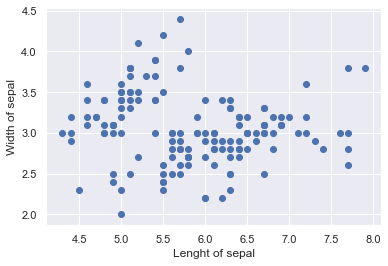

In [8]:
# Creating a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])

plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

## Clustering (unscaled data)

In [9]:
# creating a variable which will contain the data for the clustering
x = data.copy()
# creating a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# creating a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predicting the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

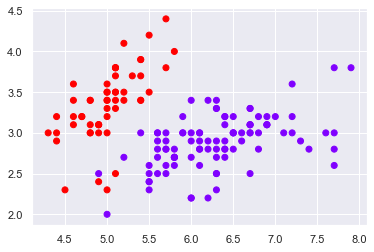

In [11]:
# creating a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

In [12]:
# importing some preprocessing module
from sklearn import preprocessing

# scaling the data for better results
x_scaled = preprocessing.scale(data)
x_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

##### Clustering (scaled data)

In [13]:
# creating a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fitting the data
kmeans_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# creating a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predicting the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

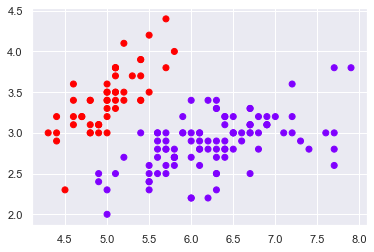

In [15]:
# creating a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

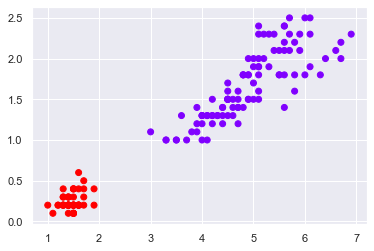

In [16]:
plt.scatter(clusters_scaled['petal_length'], clusters_scaled['petal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

### Using  WCSS

In [17]:
wcss = []

cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.61788585776678,
 91.06677122728536,
 81.71897992856151,
 71.30070564118623,
 64.89275714372417,
 56.444749212375996]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

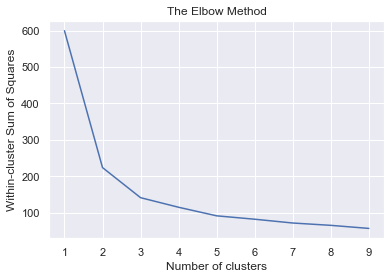

In [18]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Based on the Elbow Curve,we plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

## Constructing and comparing the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

In [19]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Constructing a scatter plot of the original data using the standartized clusters.

In [20]:
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

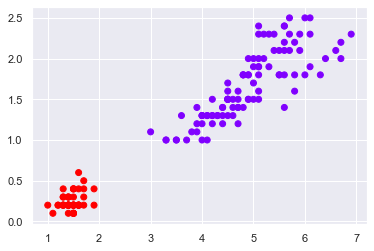

In [21]:
plt.scatter(clusters_scaled['petal_length'], clusters_scaled['petal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow');

***

## 3 Clusters

In [22]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

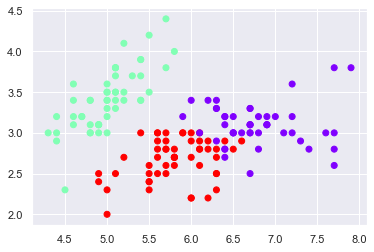

In [24]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow');


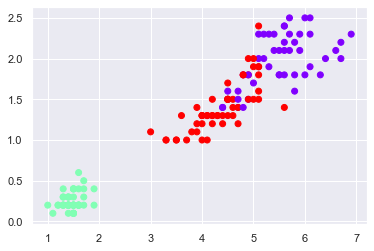

In [25]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow');

***

## 5 Clusters

In [26]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

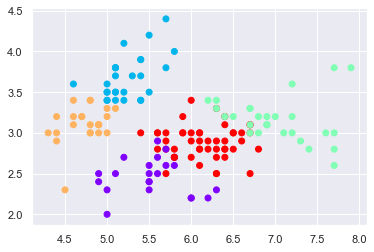

In [28]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow');

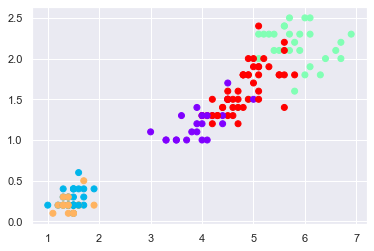

In [29]:
plt.scatter(clusters_5['petal_length'], clusters_5['petal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow');

****

## The above graphs indicates that clustering the data into 3 clusters is better than clustering into 2 or 5 clusters i.e. 3 is the optimum number of clusters.